# Week 2 : Convolution with Padding, Strides, Conv on Multi Channel Images

### 1 : Create an image X that contains diagonal edges (i.e., a matrix where the values form a diagonal pattern). Now apply a kernel K(choose any) to this image. Answer the following sub-questions:

* What happens to the image X when the kernel K is applied? Explain the result.
* What happens if you transpose the image X before applying the kernel K? How does this affect the result?
* What happens if you transpose the kernel K and apply it to the original image X? What differences do you observe compared to applying the original kernel?

### Solution

In [1]:
!wget -O diagonal_stripes_pattern.jpg "https://image.shutterstock.com/image-vector/black-white-diagonal-stripes-pattern-260nw-1932583061.jpg"

--2025-08-25 04:20:36--  https://image.shutterstock.com/image-vector/black-white-diagonal-stripes-pattern-260nw-1932583061.jpg
Resolving image.shutterstock.com (image.shutterstock.com)... 108.156.83.65, 108.156.83.129, 108.156.83.29, ...
Connecting to image.shutterstock.com (image.shutterstock.com)|108.156.83.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63687 (62K) [image/jpeg]
Saving to: ‘diagonal_stripes_pattern.jpg’

diagonal_stripes_pa 100%[===================>]  62.19K  --.-KB/s    in 0.02s   

2025-08-25 04:20:37 (2.50 MB/s) - ‘diagonal_stripes_pattern.jpg’ saved [63687/63687]



In [ ]:
!wget -O diagonal_stripes_pattern_1.jpg "https://media.istockphoto.com/id/528685339/vector/seamless-pattern.jpg?s=612x612&w=0&k=20&c=0JGLEXv5HPfl2GkTEOlcLg5VEpoD2i55Fh-5AU1ZfIA="

--2024-08-20 20:24:23--  https://media.istockphoto.com/id/528685339/vector/seamless-pattern.jpg?s=612x612&w=0&k=20&c=0JGLEXv5HPfl2GkTEOlcLg5VEpoD2i55Fh-5AU1ZfIA=
Resolving media.istockphoto.com (media.istockphoto.com)... 13.35.35.30, 13.35.35.18, 13.35.35.84, ...
Connecting to media.istockphoto.com (media.istockphoto.com)|13.35.35.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121463 (119K) [image/jpeg]
Saving to: ‘diagonal_stripes_pattern_1.jpg’

diagonal_stripes_pa 100%[===================>] 118.62K  --.-KB/s    in 0.009s  

2024-08-20 20:24:24 (12.4 MB/s) - ‘diagonal_stripes_pattern_1.jpg’ saved [121463/121463]



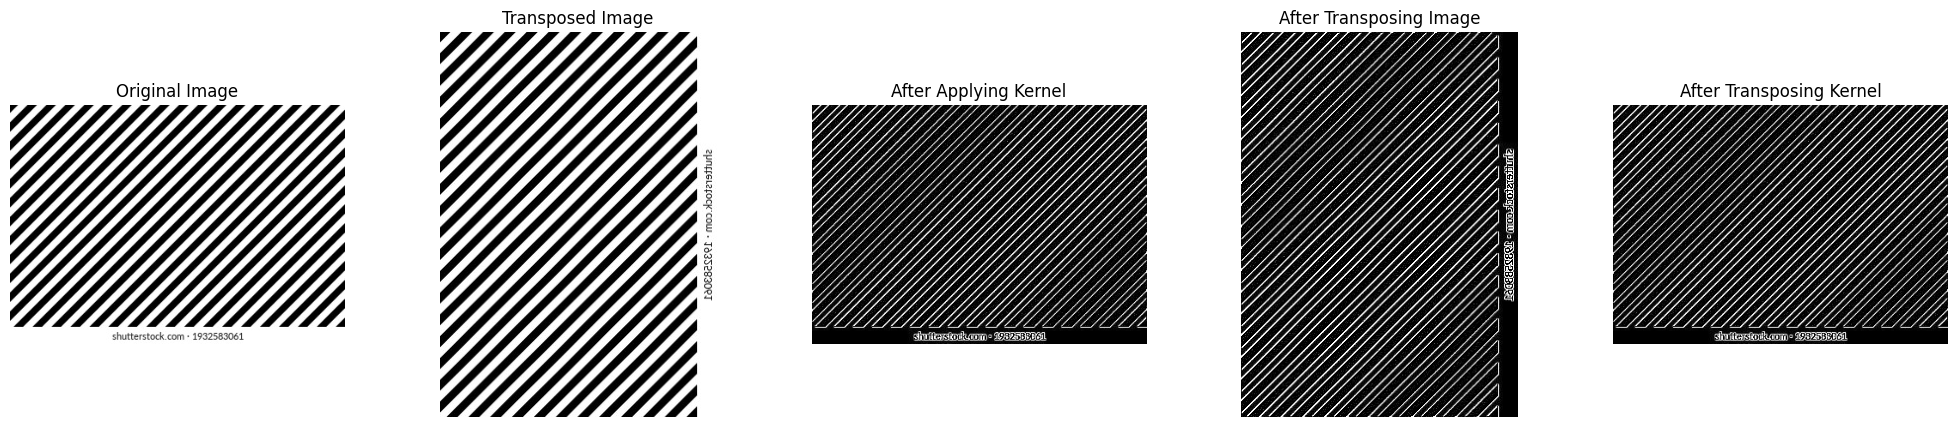

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the downloaded image
image = cv2.imread('diagonal_stripes_pattern.jpg', cv2.IMREAD_GRAYSCALE)

# Define a Kernel (e.g., simple edge detection kernel)
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]], dtype=np.float32)

# Function to convolve image with kernel
def convolve(image, kernel):
    return cv2.filter2D(image, -1, kernel)

# Apply Kernel to Original Image
convolved_original = convolve(image, kernel)

# Transpose the Image (Flip rows and columns)
image_transposed = np.transpose(image)

# Apply the Kernel to the Transposed Image
convolved_transposed_image = convolve(image_transposed, kernel)

# Transpose the Kernel and Apply to Original Image
kernel_transposed = np.transpose(kernel)
convolved_transposed_kernel = convolve(image, kernel_transposed)

# Visualization
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_transposed, cmap='gray')
axes[1].set_title('Transposed Image')
axes[1].axis('off')

axes[2].imshow(convolved_original, cmap='gray')
axes[2].set_title('After Applying Kernel')
axes[2].axis('off')

axes[3].imshow(convolved_transposed_image, cmap='gray')
axes[3].set_title('After Transposing Image')
axes[3].axis('off')

axes[4].imshow(convolved_transposed_kernel, cmap='gray')
axes[4].set_title('After Transposing Kernel')
axes[4].axis('off')

plt.show()


In [ ]:
def conv2d(X, K):
    h, w = K.shape
    Y = np.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = np.sum(X[i:i+h, j:j+w] * K)
    return Y

K = np.array([[1.0, -1.0]])
X = np.eye(6, 7)

X

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.]])

In [ ]:
first = conv2d(X, K)
first

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  1.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  1.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  1.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  1.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  1.]])

In [ ]:
X.T

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
second = conv2d(X.T, K)
second

array([[ 1.,  0.,  0.,  0.,  0.],
       [-1.,  1.,  0.,  0.,  0.],
       [ 0., -1.,  1.,  0.,  0.],
       [ 0.,  0., -1.,  1.,  0.],
       [ 0.,  0.,  0., -1.,  1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [ ]:
print("Original image conv -", first.shape)
print("After Image transform conv -", second.shape)

Original image conv - (6, 6)
After Image transform conv - (7, 5)


In [ ]:
third = conv2d(X, K.T)
third

array([[ 1., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -1.,  0.]])

In [ ]:
print("After Kernel transpose- conv -", third.shape)

After Kernel transpose- conv - (5, 7)


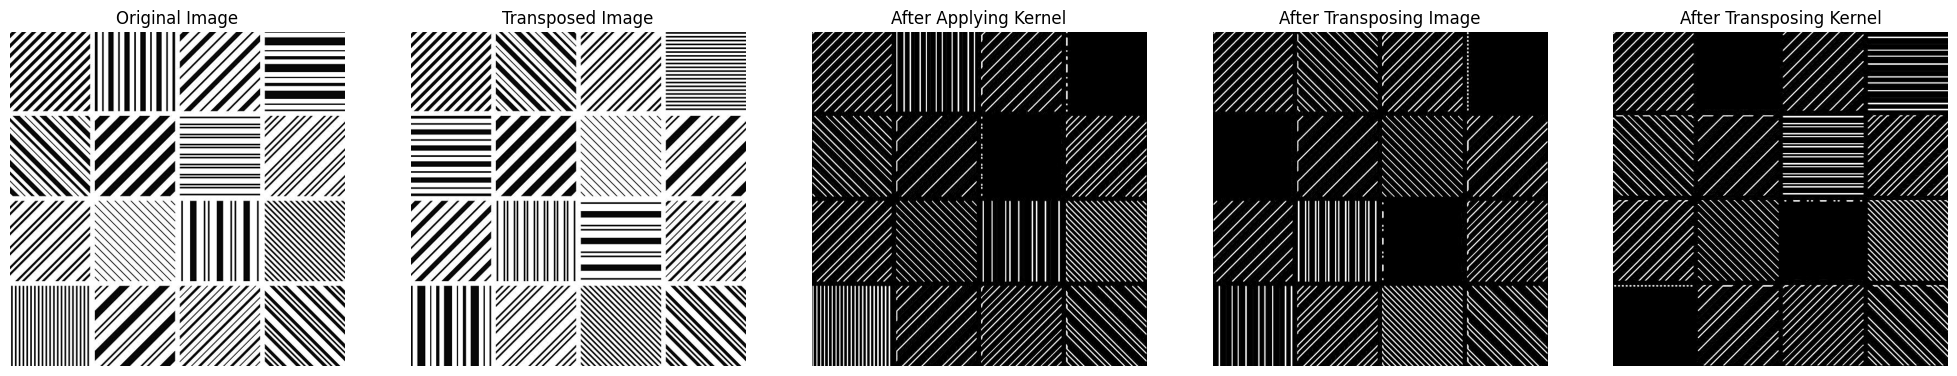

In [ ]:
# Load the downloaded image
image = cv2.imread('diagonal_stripes_pattern_1.jpg', cv2.IMREAD_GRAYSCALE)

# Define a Kernel (e.g., simple edge detection kernel)
kernel = np.array([[1, 0,-1], [1, 0,-1]], dtype=np.float32)

# Function to convolve image with kernel
def convolve(image, kernel):
    return cv2.filter2D(image, -1, kernel)

# Apply Kernel to Original Image
convolved_original = convolve(image, kernel)

# Transpose the Image (Flip rows and columns)
image_transposed = np.transpose(image)

# Apply the Kernel to the Transposed Image
convolved_transposed_image = convolve(image_transposed, kernel)

# Transpose the Kernel and Apply to Original Image
kernel_transposed = np.transpose(kernel)
convolved_transposed_kernel = convolve(image, kernel_transposed)

# Visualization
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_transposed, cmap='gray')
axes[1].set_title('Transposed Image')
axes[1].axis('off')

axes[2].imshow(convolved_original, cmap='gray')
axes[2].set_title('After Applying Kernel')
axes[2].axis('off')

axes[3].imshow(convolved_transposed_image, cmap='gray')
axes[3].set_title('After Transposing Image')
axes[3].axis('off')

axes[4].imshow(convolved_transposed_kernel, cmap='gray')
axes[4].set_title('After Transposing Kernel')
axes[4].axis('off')

plt.show()


* Observations:

- After Transposing Diagonal images have same direction of digonal line,  ut horizontal lines become vertical and vertical becomes horizontal.
- On applying kernel ([1,0,-1] is non -syymetric and it is for vertical lines detection) : we can see all places where horizontal lines are there got black.
- On applying Transpose kernel - We can see all vertical lines have disappeared.

### 2: Improve last week convolve function with padding and strides on 3D

Implement a function that performs a 3D convolution operation on an image with given padding and stride parameters. Your function should handle both zero-padding and valid (no padding) cases.

Also answer below:

* How does the output size change with different padding and stride values? Explain the relationship mathematically.

* Try implementing using Pytorch

### Solution

Shape of input image: (5, 5, 3)
Shape of kernel: (3, 3, 3)
Shape of convolution output: (3, 3, 1)


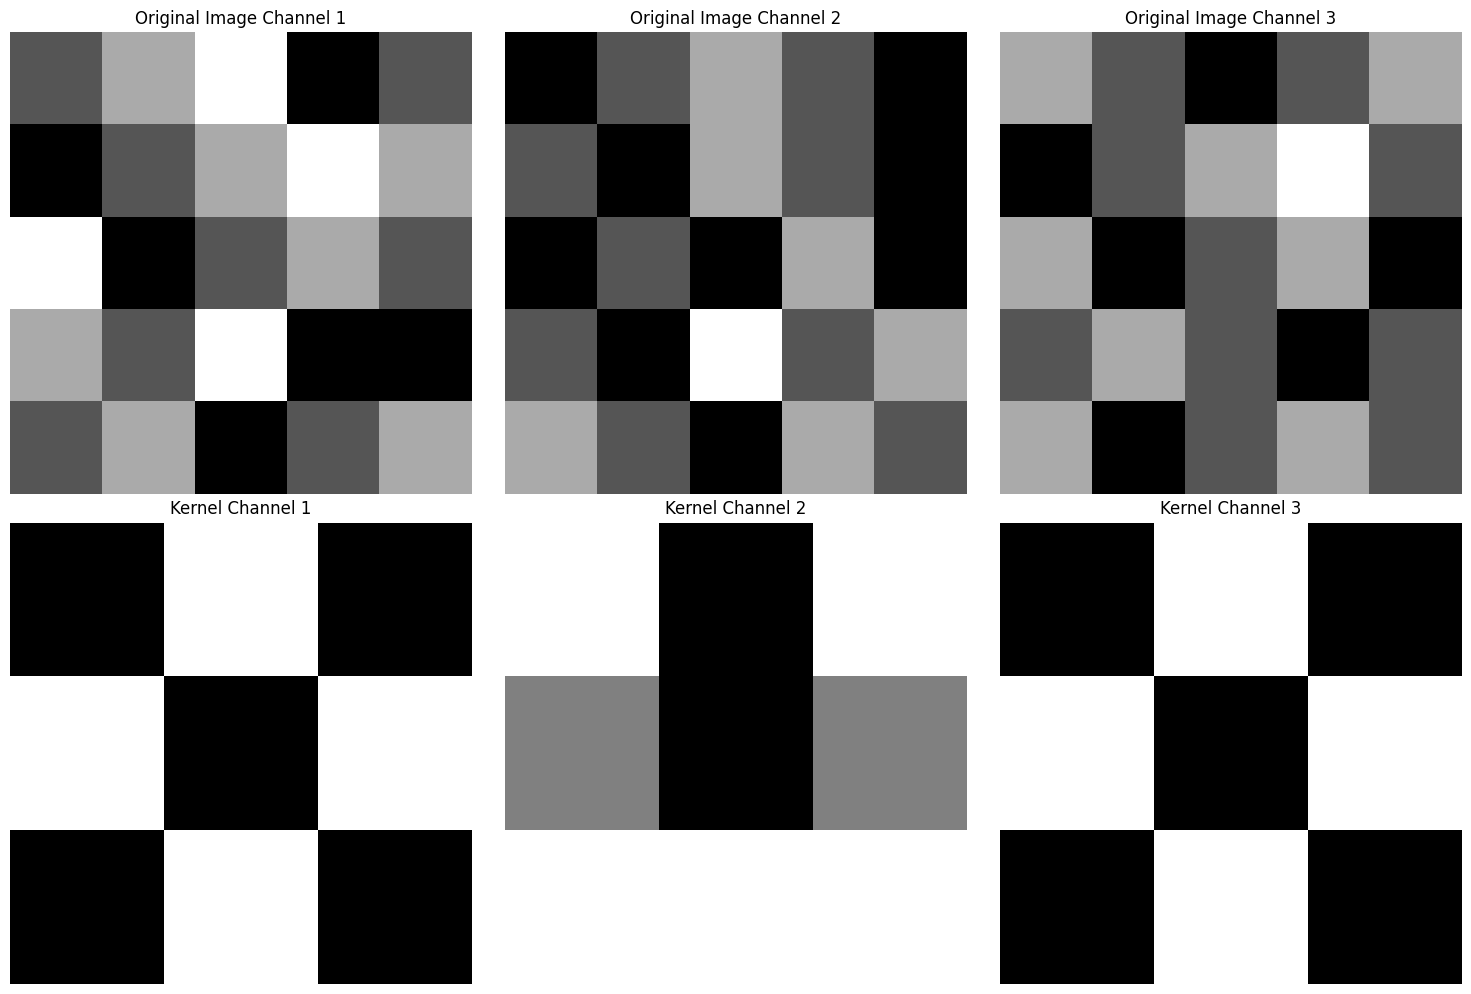

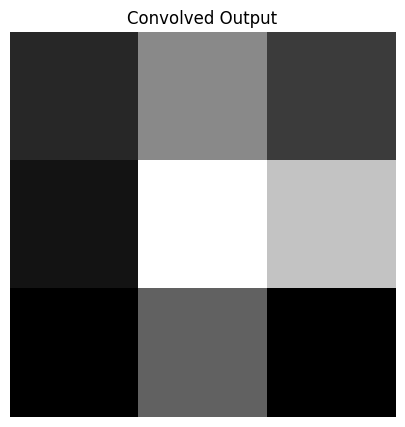

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def convolve_rgb(image, kernel, padding=0, stride=1):
    """
    Perform a 3D convolution on an RGB image with padding and stride.

    :param image: numpy array, the input image (3D)
    :param kernel: numpy array, the kernel to apply (should be the same depth as the image)
    :param padding: int, the amount of zero-padding to apply
    :param stride: int, the stride of the convolution
    :return: numpy array, the convolved image
    """
    image_h, image_w, image_c = image.shape
    kernel_h, kernel_w, kernel_c = kernel.shape

    # Apply padding to the image
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='constant')

    # Calculate the dimensions of the output image
    output_h = (image_h - kernel_h + 2 * padding) // stride + 1
    output_w = (image_w - kernel_w + 2 * padding) // stride + 1

    # Initialize the output image
    output = np.zeros((output_h, output_w, 1))

    # Perform convolution
    for k in range(image_c):  # Apply the convolution for each channel
        for i in range(output_h):
            for j in range(output_w):
                # Calculate the region of the image to apply the kernel
                region = image[i*stride:i*stride + kernel_h, j*stride:j*stride + kernel_w, k]
                # Perform element-wise multiplication and sum
                output[i, j] += np.sum(region * kernel[:, :, k])

    return output

# Define a simple 5x5x3 RGB image (3 channels)
image = np.array([
    [[1, 0, 2], [2, 1, 1], [3, 2, 0], [0, 1, 1], [1, 0, 2]],
    [[0, 1, 0], [1, 0, 1], [2, 2, 2], [3, 1, 3], [2, 0, 1]],
    [[3, 0, 2], [0, 1, 0], [1, 0, 1], [2, 2, 2], [1, 0, 0]],
    [[2, 1, 1], [1, 0, 2], [3, 3, 1], [0, 1, 0], [0, 2, 1]],
    [[1, 2, 2], [2, 1, 0], [0, 0, 1], [1, 2, 2], [2, 1, 1]]
])

# Define a 3x3x3 filter (kernel) for each channel (RGB)
kernel = np.array([
    [[0, 1, 0], [1, -1, 1], [0, 1, 0]],
    [[1, 0, 1], [0, -1, 0], [1, 0, 1]],
    [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
])

# Apply the convolution with padding and stride
output = convolve_rgb(image, kernel, padding=1, stride=2)

# Print shapes
print("Shape of input image:", image.shape)
print("Shape of kernel:", kernel.shape)
print("Shape of convolution output:", output.shape)

# Visualization of the image, kernel, and output
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot the original image slices
for i in range(3):
    axes[0, i].imshow(image[:, :, i], cmap='gray')
    axes[0, i].set_title(f'Original Image Channel {i+1}')
    axes[0, i].axis('off')

# Plot the kernel slices
for i in range(3):
    axes[1, i].imshow(kernel[:, :, i], cmap='gray')
    axes[1, i].set_title(f'Kernel Channel {i+1}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

# Visualization of the convolved output
plt.figure(figsize=(7, 5))
plt.imshow(output[:, :, 0], cmap='gray')
plt.title('Convolved Output')
plt.axis('off')
plt.show()



#### Explanation of Output Size

a. **Mathematical Relationship:**

For a 3D convolution, the output size can be determined by the following formula:

$$
\text{Output Depth} = \frac{\text{Input Depth} - \text{Kernel Depth} + 2 \times \text{Padding Depth}}{\text{Stride Depth}} + 1
$$

$$
\text{Output Height} = \frac{\text{Input Height} - \text{Kernel Height} + 2 \times \text{Padding Height}}{\text{Stride Height}} + 1
$$

$$
\text{Output Width} = \frac{\text{Input Width} - \text{Kernel Width} + 2 \times \text{Padding Width}}{\text{Stride Width}} + 1
$$

- **Padding**: Increases the size of the input volume by adding zeros around the border. It helps to control the spatial dimensions of the output volume.
- **Stride**: Determines how much the convolution filter moves with each step. A larger stride results in a smaller output dimension because the kernel skips more of the input.



Shape of input image: (6, 6, 3)
Shape of kernel: (3, 5, 3)
Image input after permute - shape: torch.Size([1, 3, 6, 6])
Kernel input after permute - shape: torch.Size([1, 3, 5, 3])
Shape of convolution output: (1, 2, 4)


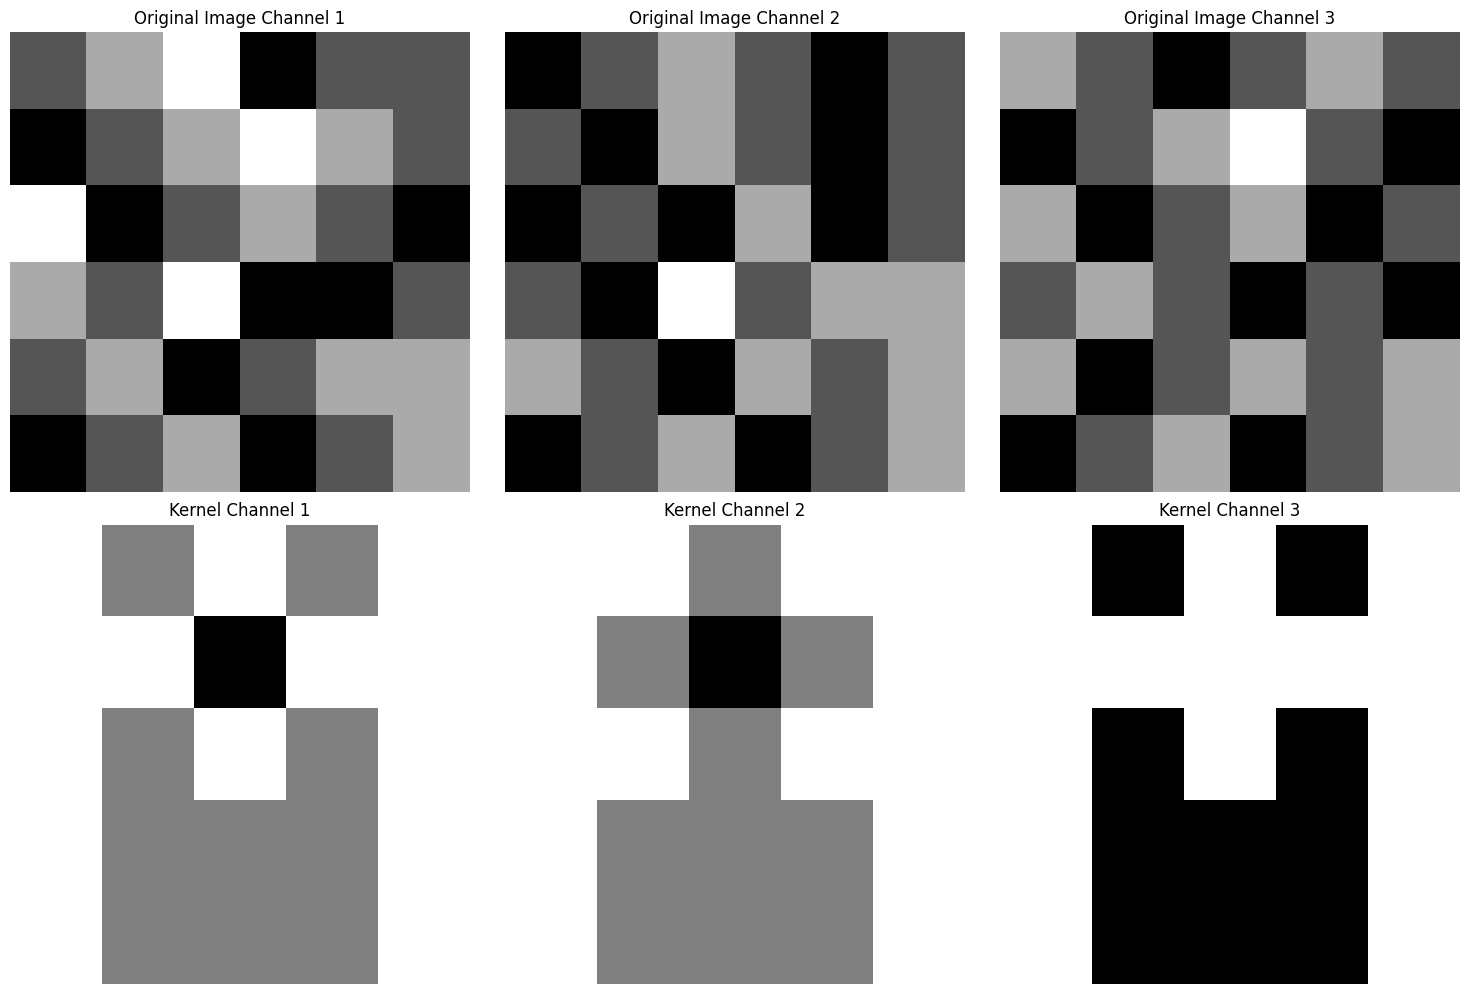

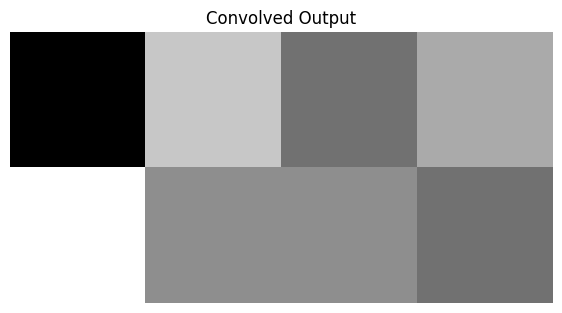

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

def convolve_rgb_2d_pytorch(image, kernel, padding=0, stride=1):
    """
    Perform a 2D convolution on an RGB image using PyTorch with a 3D kernel.

    :param image: numpy array, the input image (height, width, channels)
    :param kernel: numpy array, the kernel to apply (height, width, channels)
    :param padding: int, the amount of zero-padding to apply
    :param stride: int, the stride of the convolution
    :return: numpy array, the convolved image
    """
    # print("Image input - shape:", image.shape)
    # print("Kernel input - shape:", kernel.shape)
    # Convert numpy arrays to PyTorch tensors
    image = torch.tensor(image, dtype=torch.float).permute(2, 0, 1).unsqueeze(0)  # Add batch dimension
    kernel = torch.tensor(kernel, dtype=torch.float).unsqueeze(0)  # Add out_channels dimension

    print("Image input after permute - shape:", image.shape)
    print("Kernel input after permute - shape:", kernel.shape)

    # Define the convolution layer
    conv = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=kernel.shape[:2], padding=padding, stride=stride, bias=False)

    # Set the weights of the convolution layer to the given kernel
    conv.weight.data = kernel

    # Perform the convolution
    with torch.no_grad():
        output = conv(image)
    # print("Output Shape", output.shape)
    # Convert the result back to numpy
    output = output.squeeze().numpy()
    return output.reshape(1, *output.shape)

# Define a simple 6x6x3 RGB image (3 channels)
image = np.array([
    [[1, 0, 2], [2, 1, 1], [3, 2, 0], [0, 1, 1], [1, 0, 2], [1, 1, 1]],
    [[0, 1, 0], [1, 0, 1], [2, 2, 2], [3, 1, 3], [2, 0, 1], [1, 1, 0]],
    [[3, 0, 2], [0, 1, 0], [1, 0, 1], [2, 2, 2], [1, 0, 0], [0, 1, 1]],
    [[2, 1, 1], [1, 0, 2], [3, 3, 1], [0, 1, 0], [0, 2, 1], [1, 2, 0]],
    [[1, 2, 2], [2, 1, 0], [0, 0, 1], [1, 2, 2], [2, 1, 1], [2, 2, 2]],
    [[0, 0, 0], [1, 1, 1], [2, 2, 2], [0, 0, 0], [1, 1, 1], [2, 2, 2]]
])

# Define a 5x5x3 filter (kernel) for each channel (RGB)
kernel = np.array([
    [[0, 1, 0], [1, -1, 1], [0, 1, 0], [0, 0, 0], [0, 0, 0]],
    [[1, 0, 1], [0, -1, 0], [1, 0, 1], [0, 0, 0], [0, 0, 0]],
    [[0, 1, 0], [1, 1, 1], [0, 1, 0], [0, 0, 0], [0, 0, 0]]
])
# Print shapes
print("Shape of input image:", image.shape)
print("Shape of kernel:", kernel.shape)
# Apply the convolution with padding and stride
output = convolve_rgb_2d_pytorch(image, kernel, padding=0, stride=1)


print("Shape of convolution output:", output.shape)

# Visualization of the image, kernel, and output
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot the original image slices
for i in range(3):
    axes[0, i].imshow(image[:, :, i], cmap='gray')
    axes[0, i].set_title(f'Original Image Channel {i+1}')
    axes[0, i].axis('off')

# Plot the kernel slices
for i in range(3):
    axes[1, i].imshow(kernel[i, :, :], cmap='gray')
    axes[1, i].set_title(f'Kernel Channel {i+1}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

# Visualization of the convolved output
plt.figure(figsize=(7, 5))
plt.imshow(output[0,:, :], cmap='gray')
plt.title('Convolved Output')
plt.axis('off')
plt.show()


In [ ]:
!wget -O hill.jpeg "https://www.shutterstock.com/image-photo/dodgeville-wisconsin-usa-08312022-contoured-600nw-2199893641.jpg"

--2024-08-20 20:24:43--  https://www.shutterstock.com/image-photo/dodgeville-wisconsin-usa-08312022-contoured-600nw-2199893641.jpg
Resolving www.shutterstock.com (www.shutterstock.com)... 13.35.166.42, 13.35.166.76, 13.35.166.120, ...
Connecting to www.shutterstock.com (www.shutterstock.com)|13.35.166.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118544 (116K) [image/jpeg]
Saving to: ‘hill.jpeg’

hill.jpeg           100%[===================>] 115.77K  --.-KB/s    in 0.01s   

2024-08-20 20:24:43 (8.77 MB/s) - ‘hill.jpeg’ saved [118544/118544]



Shape of input image: (400, 600, 3)
Shape of input kernel: (3, 3, 3)
Image input after permute - shape: torch.Size([1, 3, 400, 600])
Kernel input after permute - shape: torch.Size([1, 3, 3, 3])
(1, 398, 598)


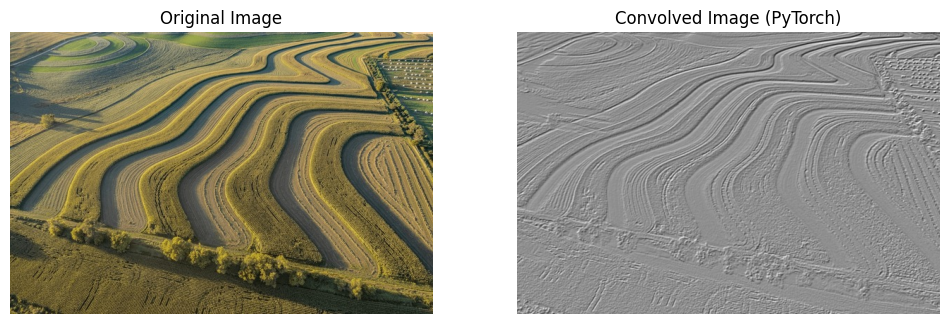

In [ ]:
import torch
import torch.nn as nn
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load RGB image using cv2
image_path = 'hill.jpeg'  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
print("Shape of input image:", image.shape)


# Define a 5x5x3 edge detection kernel
# Example: Sobel edge detection kernel for simplicity
edge_detection_kernel = np.array([
    [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]],
    [[-1, -2, -1], [0, 0, 0], [1, 2, 1]],
    [[-1, -1, -1], [0, 0, 0], [1, 1, 1]]
], dtype=np.float32)

print("Shape of input kernel:", edge_detection_kernel.shape)



output = convolve_rgb_2d_pytorch(image, edge_detection_kernel)

print(output.shape)

# Plot the original and convolved images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output[0], cmap='gray')
plt.title('Convolved Image (PyTorch)')
plt.axis('off')

plt.show()


### 3. Implement Different padding

* Mirror
* Reflect


Improve above convolution code to apply mirror padding

Mirror padding: padding where the border values are simply mirrored to extend tensors.


Eg. -


Original :
```
[[1, 2, 5, 9, 6],
 [4, 7, 0, 1, 2],
 [3, 4, 5, 6, 7],
 [0, 1, 2, 3, 4],
 [5, 6, 7, 0, 1]]
```


Mirror Padded with size 2:
```
[[5 4 3 4 5 6 7 6 5]
 [0 7 4 7 0 1 2 1 0]
 [5 2 1 2 5 9 6 9 5]
 [0 7 4 7 0 1 2 1 0]
 [5 4 3 4 5 6 7 6 5]
 [2 1 0 1 2 3 4 3 2]
 [7 6 5 6 7 0 1 0 7]
 [2 1 0 1 2 3 4 3 2]
 [5 4 3 4 5 6 7 6 5]]
 ```


Replicate Padded with size 2:
```
[[1 1 2 3 4 5 5]
 [1 1 2 3 4 5 5]
 [6 6 7 0 1 2 2]
 [3 3 4 5 6 7 7]
 [0 0 1 2 3 4 4]
 [5 5 6 7 0 1 1]
 [5 5 6 7 0 1 1]]
 ```







### Solution

In [ ]:
import numpy as np

image_array = np.array([[1, 2, 5, 9, 6],
                        [4, 7, 0, 1, 2],
                        [3, 4, 5, 6, 7],
                        [0, 1, 2, 3, 4],
                        [5, 6, 7, 0, 1]])

def mirror_padding(arr, padding_size):
    return np.pad(arr, pad_width=padding_size, mode='reflect')

# Apply mirror padding with a padding size of 1
mirror_padded_image = mirror_padding(image_array, 2)

print("\nMirror Padded Array:")
print(mirror_padded_image)


Mirror Padded Array:
[[5 4 3 4 5 6 7 6 5]
 [0 7 4 7 0 1 2 1 0]
 [5 2 1 2 5 9 6 9 5]
 [0 7 4 7 0 1 2 1 0]
 [5 4 3 4 5 6 7 6 5]
 [2 1 0 1 2 3 4 3 2]
 [7 6 5 6 7 0 1 0 7]
 [2 1 0 1 2 3 4 3 2]
 [5 4 3 4 5 6 7 6 5]]


In [ ]:
import numpy as np

image_array = np.array([[1, 2, 3, 4, 5],
                        [6, 7, 0, 1, 2],
                        [3, 4, 5, 6, 7],
                        [0, 1, 2, 3, 4],
                        [5, 6, 7, 0, 1]])

def replicate_padding(arr, padding_size):
    return np.pad(arr, pad_width=padding_size, mode='edge')

# Apply replicate padding with a padding size of 1
replicate_padded_image = replicate_padding(image_array, 1)

print("\nReplicate Padded Array:")
print(replicate_padded_image)


Replicate Padded Array:
[[1 1 2 3 4 5 5]
 [1 1 2 3 4 5 5]
 [6 6 7 0 1 2 2]
 [3 3 4 5 6 7 7]
 [0 0 1 2 3 4 4]
 [5 5 6 7 0 1 1]
 [5 5 6 7 0 1 1]]


###4. Downsample Image Using Convolve and Slicing

* **Convolution**:
    - Choose an appropriate kernel size and stride value that will downsample the image from size 𝑚 × n to 𝑚/2 × n/2.

* **Slicing**:

    - Downsample the image by concatenating alternate slices (i.e., take every second row and column to reduce the image size).


* Compare the visual quality and computational efficiency of the downsampled images.


#### Solution

* Conv Method

Original image shape: (400, 600, 3)
Output shape: (200, 300, 3)
Original image memory usage: 0.69 MB
Downsampled image memory usage: 0.17 MB


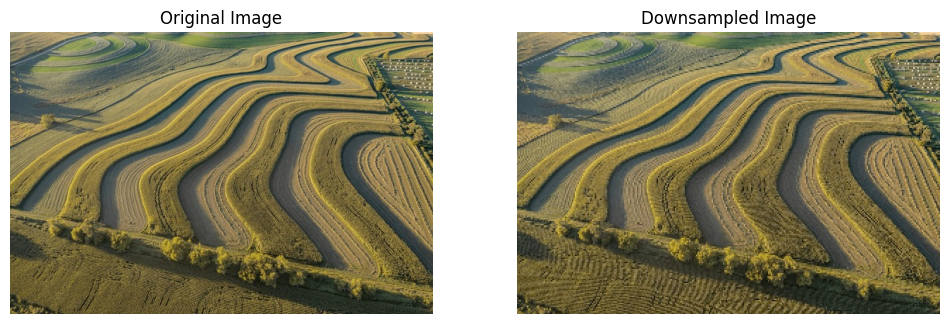

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def convolve_rgb(image, kernel, padding=0, stride=1):
    """
    Perform a 3D convolution on an RGB image with padding and stride.

    :param image: numpy array, the input image (height, width, channels)
    :param kernel: numpy array, the kernel to apply (height, width, channels)
    :param padding: int, the amount of zero-padding to apply
    :param stride: int, the stride of the convolution
    :return: numpy array, the convolved image
    """
    image_h, image_w, image_c = image.shape
    kernel_h, kernel_w, kernel_c = kernel.shape

    # Check that kernel depth matches image channels
    if kernel_c != image_c:
        raise ValueError("Kernel depth must match image channels")

    # Apply padding to the image
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='constant')

    # Calculate the dimensions of the output image
    output_h = (image_h - kernel_h + 2 * padding) // stride + 1
    output_w = (image_w - kernel_w + 2 * padding) // stride + 1

    # Initialize the output image
    output = np.zeros((output_h, output_w, image_c), dtype=np.uint8)

    # Perform convolution
    for k in range(image_c):  # Apply the convolution for each channel
        for i in range(output_h):
            for j in range(output_w):
                # Calculate the region of the image to apply the kernel
                region = image[i*stride:i*stride + kernel_h, j*stride:j*stride + kernel_w, k]
                # Perform element-wise multiplication and sum
                output[i, j, k] = np.sum(region * kernel[:, :, k])

    return output

# Load RGB image using cv2
image_path = 'hill.jpeg'  # Replace with your image path
image = cv2.imread(image_path)



# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("Original image shape:", image.shape)

# Define a 3x3 identity kernel for each channel
def create_identity_kernel(size):
    kernel = np.zeros((size, size))
    center = size // 2
    kernel[center, center] = 1
    return kernel

kernel_size = 3
kernel = np.stack([create_identity_kernel(kernel_size)] * 3, axis=-1)

# Apply convolution
output = convolve_rgb(image, kernel, padding=1, stride=2)
print("Output shape:", output.shape)

# Save the downsampled image
output_image_path = 'downsampled_image.png'
cv2.imwrite(output_image_path, cv2.cvtColor(output.astype(np.uint8), cv2.COLOR_RGB2BGR))

# Display memory usage
original_memory = image.nbytes / (1024 * 1024)  # Convert bytes to MB
downsampled_memory = output.nbytes / (1024 * 1024)  # Convert bytes to MB

print(f"Original image memory usage: {original_memory:.2f} MB")
print(f"Downsampled image memory usage: {downsampled_memory:.2f} MB")

# Plot the original and downsampled images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Downsampled Image
plt.subplot(1, 2, 2)
plt.imshow(output)
plt.title('Downsampled Image')
plt.axis('off')

plt.show()


* Slicing

Original image shape: (400, 600, 3)
Downsampled image shape - slicing: (200, 300, 3)
Original image memory usage: 0.69 MB
Downsampled image memory usage: 0.17 MB


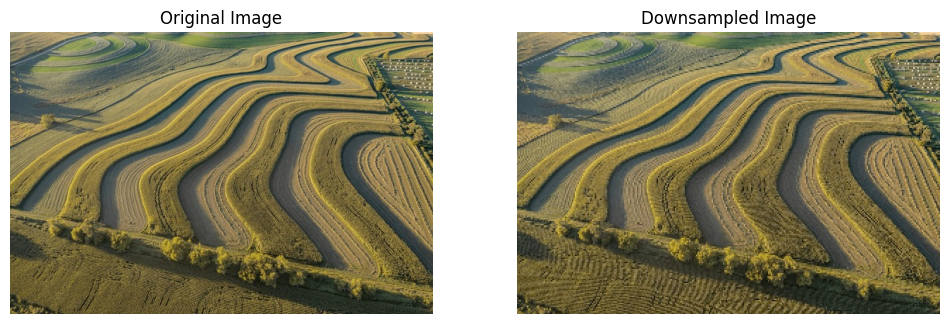

In [ ]:

# Load RGB image using cv2
image_path = 'hill.jpeg'  # Replace with your image path
image = cv2.imread(image_path)

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("Original image shape:", image.shape)

# Downsample using slicing (every other pixel)
downsampled_image = image[::2, ::2, :]
print("Downsampled image shape - slicing:", downsampled_image.shape)

# Save the downsampled image
output_image_path = 'downsampled_image_slicing.png'
cv2.imwrite(output_image_path, cv2.cvtColor(downsampled_image, cv2.COLOR_RGB2BGR))

# Display memory usage
original_memory = image.nbytes / (1024 * 1024)  # Convert bytes to MB
downsampled_memory = downsampled_image.nbytes / (1024 * 1024)  # Convert bytes to MB

print(f"Original image memory usage: {original_memory:.2f} MB")
print(f"Downsampled image memory usage: {downsampled_memory:.2f} MB")

# Plot the original and downsampled images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Downsampled Image
plt.subplot(1, 2, 2)
plt.imshow(downsampled_image)
plt.title('Downsampled Image')
plt.axis('off')

plt.show()


## 5. Perform different Operations on 3-Channel images

* Color Filters : Red, Blue, Green
* Image Operations : Contrast, Brightness, Color Balacing


Note: Can use scikit-image to import images

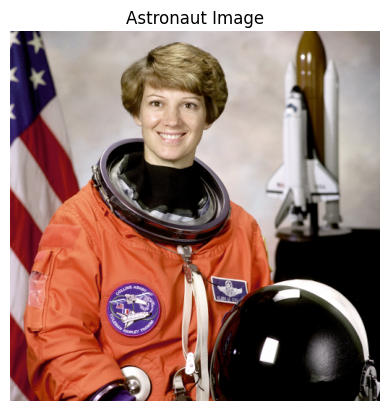

Image shape: (512, 512, 3)


In [ ]:
import matplotlib.pyplot as plt
from skimage import data, io

# Load a sample image from skimage's data module
image = data.astronaut()  # This is a 3-channel (RGB) image

# Display the image
plt.imshow(image)
plt.title('Astronaut Image')
plt.axis('off')  # Hide axis
plt.show()

# Check the shape of the image
print(f"Image shape: {image.shape}")  # Should be something like (512, 512, 3)


### Solution

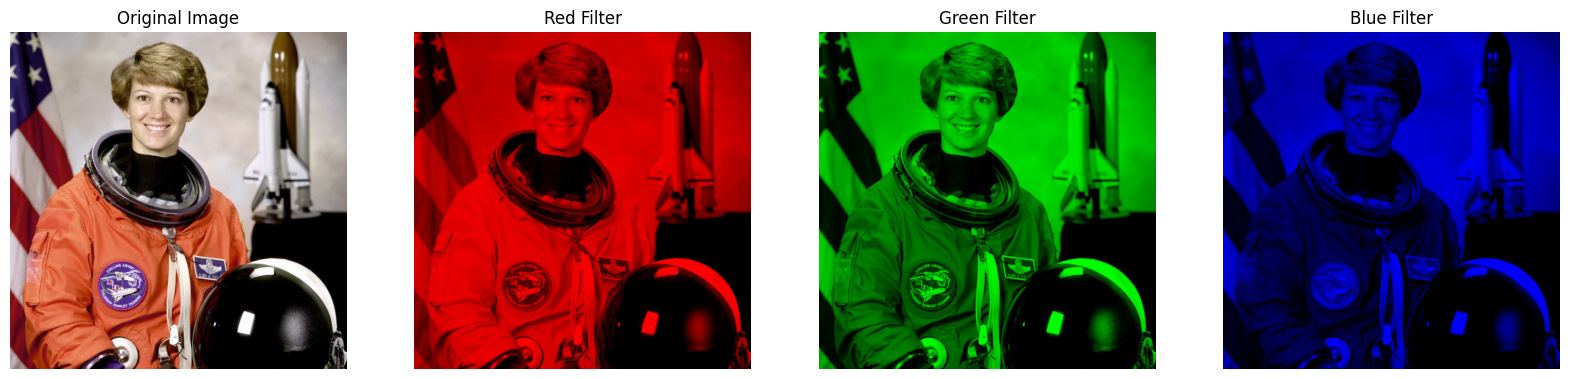

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float

# Load an RGB image
image = img_as_float(data.astronaut())
image_h, image_w, image_c = image.shape

# Define color filters
red_filter = np.array([[1, 0, 0]])
green_filter = np.array([[0, 1, 0]])
blue_filter = np.array([[0, 0, 1]])

# Function to apply a color filter
def apply_color_filter(image, color_filter):
    return image * color_filter

# Apply color filters
red_image = apply_color_filter(image, red_filter)
green_image = apply_color_filter(image, green_filter)
blue_image = apply_color_filter(image, blue_filter)

# Plot the original and filtered images
fig, axes = plt.subplots(1, 4, figsize=(20, 10))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(red_image)
axes[1].set_title('Red Filter')
axes[1].axis('off')

axes[2].imshow(green_image)
axes[2].set_title('Green Filter')
axes[2].axis('off')

axes[3].imshow(blue_image)
axes[3].set_title('Blue Filter')
axes[3].axis('off')

plt.show()


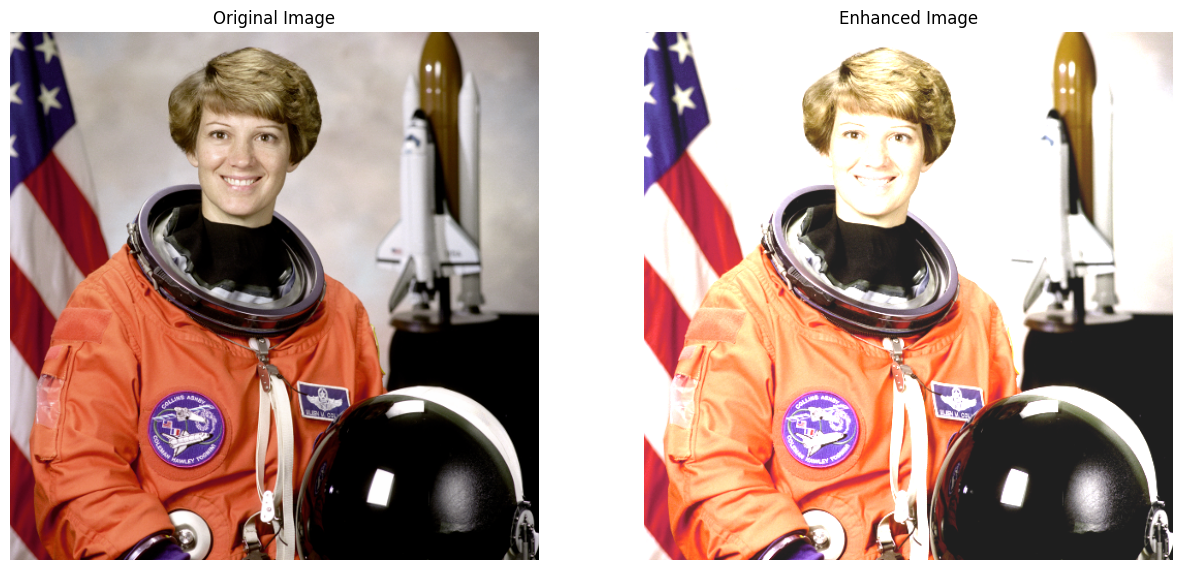

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Load image
image = data.astronaut()

# Adjust brightness and contrast
def enhance_brightness_contrast(image, brightness=30, contrast=1.5):
    enhanced_image = image * contrast + brightness
    enhanced_image = np.clip(enhanced_image, 0, 255)  # Ensure pixel values are within valid range
    return enhanced_image.astype(np.uint8)

enhanced_image = enhance_brightness_contrast(image)

# Plot the original and enhanced images
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(enhanced_image)
axes[1].set_title('Enhanced Image')
axes[1].axis('off')

plt.show()


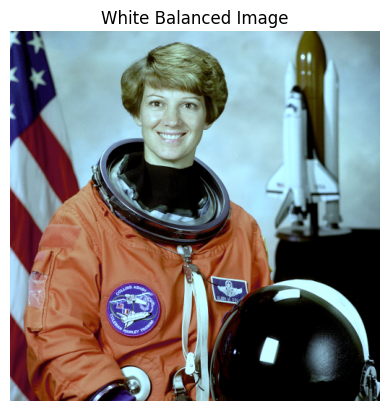

In [ ]:
def white_balance(image):
    r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]
    avg_r, avg_g, avg_b = np.mean(r), np.mean(g), np.mean(b)
    avg = (avg_r + avg_g + avg_b) / 3
    r = r * (avg / avg_r)
    g = g * (avg / avg_g)
    b = b * (avg / avg_b)
    balanced_image = np.stack([r, g, b], axis=-1)
    return np.clip(balanced_image, 0, 255).astype(np.uint8)

balanced_image = white_balance(image)

# Plot the balanced image
plt.imshow(balanced_image)
plt.title('White Balanced Image')
plt.axis('off')
plt.show()


## 6. Create a basic Convolutional Neural Network (CNN) architecture using Keras with TensorFlow. The network should have the following specifications:

1. **Layer Configuration**:
   - **1st Layer**: Convolutional layer with 256 filters, a kernel size of 3x3, and ReLU activation.
   - **2nd Layer**: Convolutional layer with 128 filters, a kernel size of 3x3, and ReLU activation.
   - **3rd Layer**: Convolutional layer with 64 filters, a kernel size of 3x3, and ReLU activation.
   - **4th Layer**: Convolutional layer with 281 filters, a kernel size of 3x3, and ReLU activation.
   - **5th Layer**: Convolutional layer with 256 filters, a kernel size of 3x3, and ReLU activation.

2. **Batch Normalization**:
   - Apply Batch Normalization after the 1st, 3rd, and 5th convolutional layers.

3. **Additional Requirements**:
   - Use padding='same' for all convolutional layers to maintain spatial dimensions.
   - Include a MaxPooling2D layer after each convolutional layer (except the last) to reduce spatial dimensions.
   - Add a Flatten layer followed by a Dense layer with 10 units and a softmax activation for classification.

Provide the complete code for building this CNN architecture in Keras with TensorFlow.


### Solution:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, MaxPooling2D, Flatten, Dense, Input

# Define the CNN model
model = Sequential()

# Input Layer
model.add(Input(shape=(32, 32, 3)))  # Adjust input shape as needed

# 1st Convolutional Layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D((2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(ReLU())
model.add(MaxPooling2D((2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D((2, 2)))

# 4th Convolutional Layer
model.add(Conv2D(281, (3, 3), padding='same'))
model.add(ReLU())
model.add(MaxPooling2D((2, 2)))

# 5th Convolutional Layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D((2, 2)))

# Flatten and Dense Layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 256)         │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 281)           │         162,137 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 4, 4, 281)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 281)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 256)           │         647,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           2,5

 Total params: 1,190,691 (4.54 MB)

 Trainable params: 1,189,539 (4.54 MB)

 Non-trainable params: 1,152 (4.50 KB)